In [2]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:

df = pd.read_table('/Users/Andrew/Downloads/jan76_dec17.ndk', header=None)

In [4]:
#filter to get every fifth row and reset index
df_filter = df.iloc[::5, :].reset_index()

In [5]:
#now, according to https://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/allorder.ndk_explained
#the relevant data in the first line are:
#[28-33] Latitude
#[35-41] Longitude
#[43-47] Depth
#[49-55] Reported magnitudes, usually mb and MS

###we will split the row into the sections to use

In [6]:
latitudes = []
longitudes = []
depths = []
magntiudes_MB = []
magntiudes_MS = []
for index, row in df_filter.iterrows():

    #occassionly if there is no data in the first entry
    if row[0][0] == ' ':
        print(row[0])
        row_split = row[0].split()
        latitudes.append(float(row_split[2]))
        longitudes.append(float(row_split[3]))
        depths.append(float(row_split[4]))
        magntiudes_MB.append(float(row_split[5]))
        magntiudes_MS.append(float(row_split[6]))

    #row[0] gives us a string of each row, which we can then split and convert to float
    else:
        row_split = row[0].split()
    
        latitudes.append(float(row_split[3]))
        longitudes.append(float(row_split[4]))
        depths.append(float(row_split[5]))
        magntiudes_MB.append(float(row_split[6]))
        magntiudes_MS.append(float(row_split[7]))

latitudes = np.asarray(latitudes)
longitudes = np.asarray(longitudes)
depths = np.asarray(depths)
magntiudes_MB = np.asarray(magntiudes_MB)
magntiudes_MS = np.asarray(magntiudes_MS)

     1980/07/29 12:23:12.3  29.33   81.26  34.0 5.7 5.2 NEPAL
     1980/11/06 01:34:24.8  43.75   86.14  14.0 5.6 5.4 NO SINKIANG PROV, CHINA
     1980/12/07 17:37:09.7  36.03    1.23  10.0 0.0 0.0


In [7]:
intermediate_latitudes =  latitudes[(depths > 70) & (depths < 300)]
intermediate_longitudes =  longitudes[(depths > 70) & (depths < 300)]
intermediate_depths =  depths[(depths > 70) & (depths < 300)]
intermediate_magntiudes_MB =  magntiudes_MB[(depths > 70) & (depths < 300)]
intermediate_magntiudes_MS =  magntiudes_MS[(depths > 70) & (depths < 300)]


In [8]:
xy = np.vstack([intermediate_longitudes,intermediate_latitudes])
z = gaussian_kde(xy)(xy)

In [73]:
len(labels)

15

/opt/anaconda3/envs/Python3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


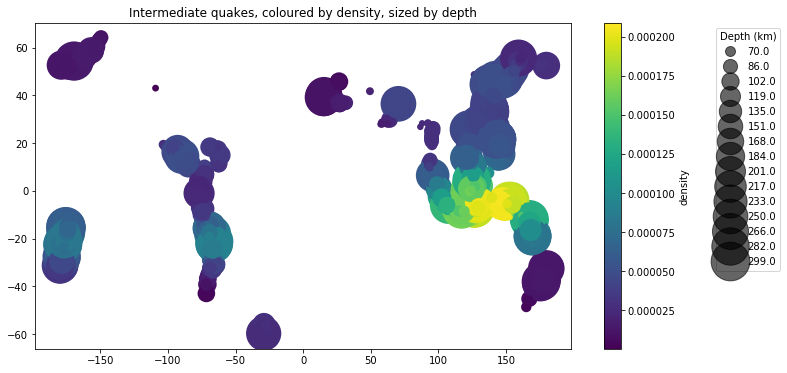

In [118]:
fig, ax = plt.subplots(figsize=(12,6))
scatter = ax.scatter(intermediate_longitudes, intermediate_latitudes, c=z, s=(intermediate_depths**2.5)/1000, edgecolor='')

handles, labels = scatter.legend_elements(prop = 'sizes', alpha=0.6)
my_labels = np.floor(np.linspace(np.min(intermediate_depths),np.max(intermediate_depths),len(labels)))
legend2 = ax.legend(handles, my_labels, loc = 'upper right', bbox_to_anchor=(1.4, 1), title = 'Depth (km)')
cbar = fig.colorbar(scatter)
cbar.set_label('density')
fig.show()
ax.set_title('Intermediate quakes, coloured by density, sized by depth')
plt.savefig('Fig3.png')

/opt/anaconda3/envs/Python3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


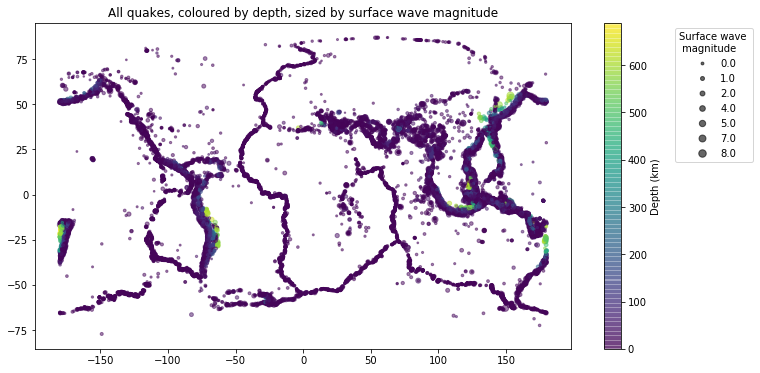

In [111]:
fig, ax = plt.subplots(figsize=(12,6))
scatter = ax.scatter(longitudes, latitudes, alpha=0.5, 
            c=depths, s=(magntiudes_MS**4)/100)

handles, labels = scatter.legend_elements(prop = 'sizes', alpha=0.6)
my_labels = np.floor(np.linspace(np.min(magntiudes_MS),np.max(magntiudes_MS),len(labels)))
legend2 = ax.legend(handles, my_labels, loc = 'upper right', bbox_to_anchor=(1.35, 1), title = 'Surface wave \n magnitude')
cbar = fig.colorbar(scatter)
cbar.set_label('Depth (km)')
fig.show()
ax.set_title('All quakes, coloured by depth, sized by surface wave magnitude')
plt.savefig('Fig2.png')

/opt/anaconda3/envs/Python3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


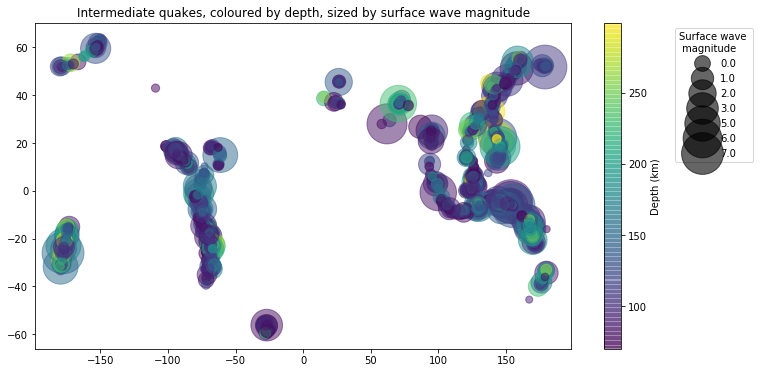

In [112]:
fig, ax = plt.subplots(figsize=(12,6))
scatter = ax.scatter(intermediate_longitudes, intermediate_latitudes, alpha=0.5, 
            c=intermediate_depths, s=(intermediate_magntiudes_MS**7)/1000)

handles, labels = scatter.legend_elements(prop = 'sizes', alpha=0.6)
my_labels = np.floor(np.linspace(np.min(intermediate_magntiudes_MS),np.max(intermediate_magntiudes_MS),len(labels)))
legend2 = ax.legend(handles, my_labels, loc = 'upper right', bbox_to_anchor=(1.35, 1), title = 'Surface wave \n magnitude')
cbar = fig.colorbar(scatter)
cbar.set_label('Depth (km)')
fig.show()
ax.set_title('Intermediate quakes, coloured by depth, sized by surface wave magnitude')
plt.savefig('Fig3.png')

In [20]:
for i in range(10):
    print(i**5/1000)

0.0
0.001
0.032
0.243
1.024
3.125
7.776
16.807
32.768
59.049
